In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures

# Cargando Datos

In [2]:
import zipfile
with zipfile.ZipFile('valoracion_aerolineas.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [3]:
# Cargando ambos data sets por separado
df_train = pd.read_csv('/content/dataset/train.csv')
df_test = pd.read_csv('/content/dataset/test.csv')

In [4]:
# Mostrando las columnas del dataset
df_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
df_test.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [6]:
df_final = pd.concat([df_train, df_test], ignore_index=True)
df_final

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [7]:
# Limpiamos los datos
df_final = df_final.dropna()
df_final

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [8]:
df_final.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,44158.973480,64958.335169,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,31209.526335,37489.781165,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16230.000000,32494.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38966.000000,64972.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71440.500000,97415.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
df_final.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Selección de columnas para trabajar

In [10]:
drop_columns = ['Unnamed: 0', 'id']
data = df_final.drop(drop_columns, axis=1)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# 
# 
# 
# 
# 
# 

#  

# FEATURES

In [11]:
# Gráfico de torta
def pie_chart(data_column, axes, title):
    column_count = data_column.value_counts()
    axes.pie(column_count, labels=column_count.index, autopct='%1.0f%%', colors=sns.color_palette('viridis', len(column_count)))
    axes.axis('equal')
    axes.set_title(title)

def bar_chart(df, column, hue, xlabel, title, axes):
    sns.countplot(ax=axes, data=df, x=column, hue=hue, palette='viridis')
    axes.set_xlabel(xlabel)
    axes.set_ylabel("Cantidad")
    axes.set_title(title)

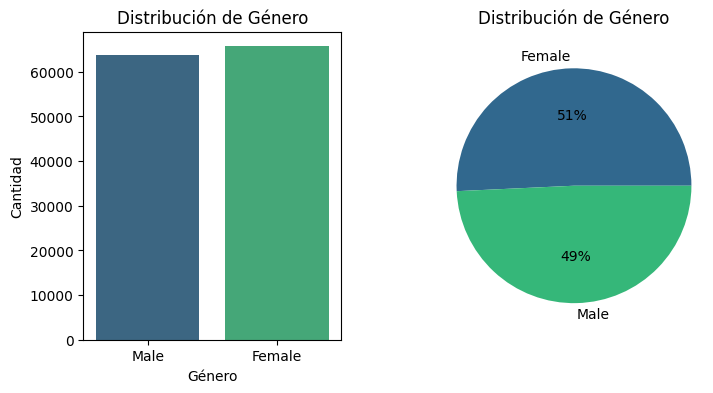

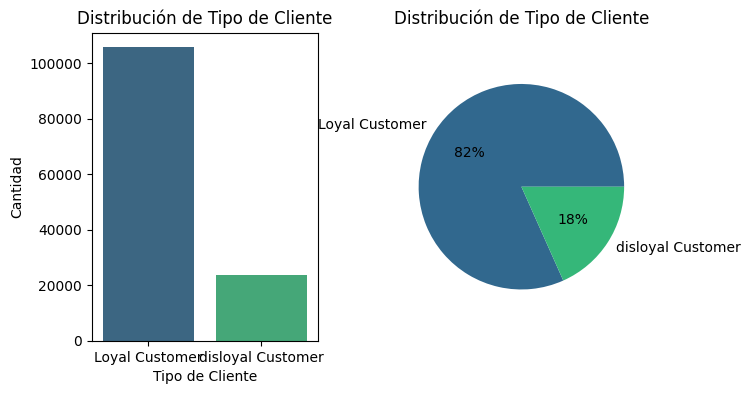

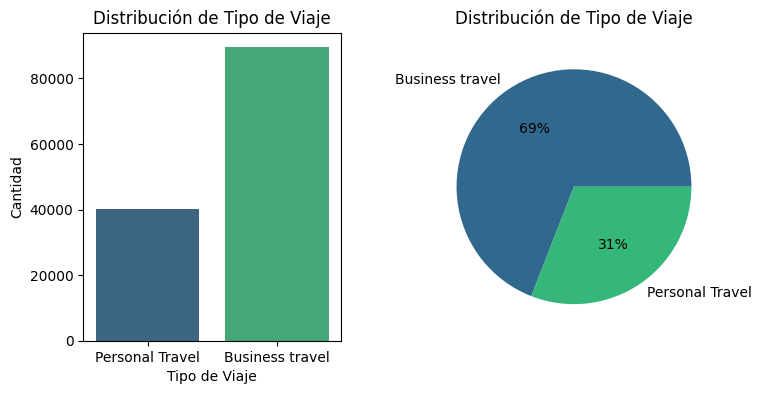

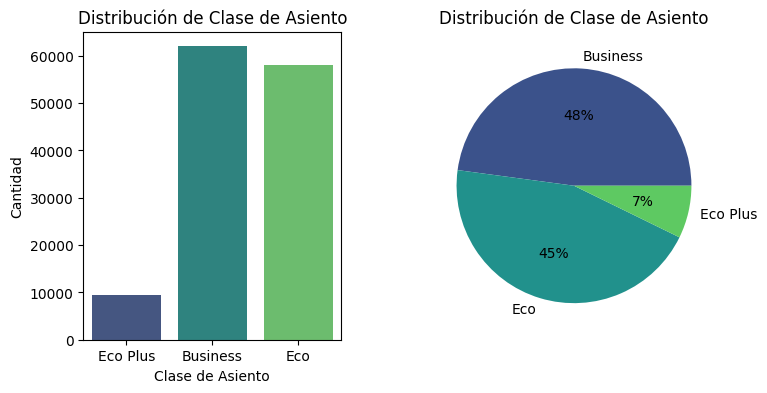

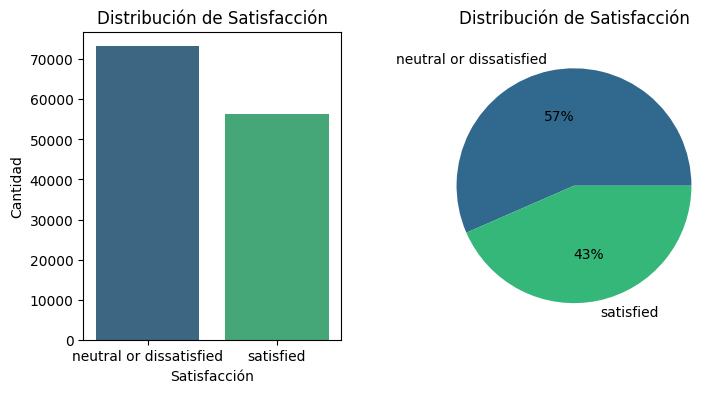

In [12]:
# Visualización de Género
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
pie_chart(data['Gender'], axes[1],"Distribución de Género")
bar_chart(data,'Gender',data['Gender'],'Género', "Distribución de Género",axes[0])
plt.subplots_adjust(wspace=0.4)
plt.show()

# Visualización de Tipo de Cliente
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
bar_chart(data,'Customer Type',data['Customer Type'],'Tipo de Cliente', "Distribución de Tipo de Cliente",axes[0])
pie_chart(data['Customer Type'], axes[1], "Distribución de Tipo de Cliente")
plt.subplots_adjust(wspace=0.4)
plt.show()

# Visualización de Tipo de Viaje
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
bar_chart(data,'Type of Travel',data['Type of Travel'],'Tipo de Viaje', "Distribución de Tipo de Viaje",axes[0])
pie_chart(data['Type of Travel'], axes[1], "Distribución de Tipo de Viaje")
plt.subplots_adjust(wspace=0.4)
plt.show()

# Visualización de Clase de Asiento
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
bar_chart(data,'Class',data['Class'],'Clase de Asiento', "Distribución de Clase de Asiento",axes[0])
pie_chart(data['Class'], axes[1], "Distribución de Clase de Asiento")
plt.subplots_adjust(wspace=0.4)
plt.show()

# Visualización de Nivel de Satisfacción
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
bar_chart(data,'satisfaction',data['satisfaction'],'Satisfacción', "Distribución de Satisfacción",axes[0])
pie_chart(data['satisfaction'], axes[1], "Distribución de Satisfacción")
plt.subplots_adjust(wspace=0.4)
plt.show()

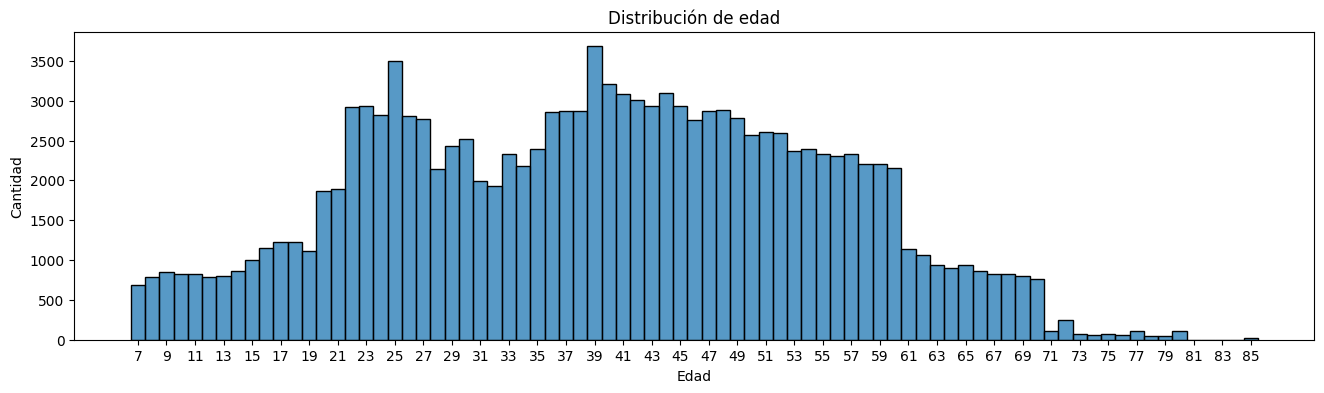

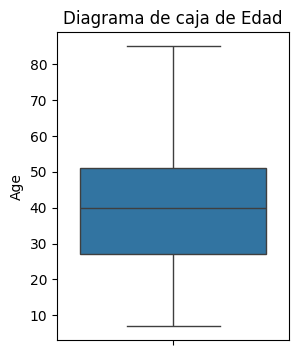

In [13]:
#Histograma de la columna edad
plt.figure(figsize=(16, 4))
sns.histplot(data=data, x='Age', discrete=True)
plt.title("Distribución de edad")
plt.xlabel("Edad")
plt.xticks(range(int(data['Age'].min()), int(data['Age'].max())+1, 2))
plt.ylabel("Cantidad")
plt.show()

#Gráfico de caja de la columna edad
fig, ax = plt.subplots(figsize=(3, 4)) 
sns.boxplot(data["Age"]);
plt.title("Diagrama de caja de Edad");
plt.show()

c:\Users\ddcre\anaconda3\envs\tensorenviron\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


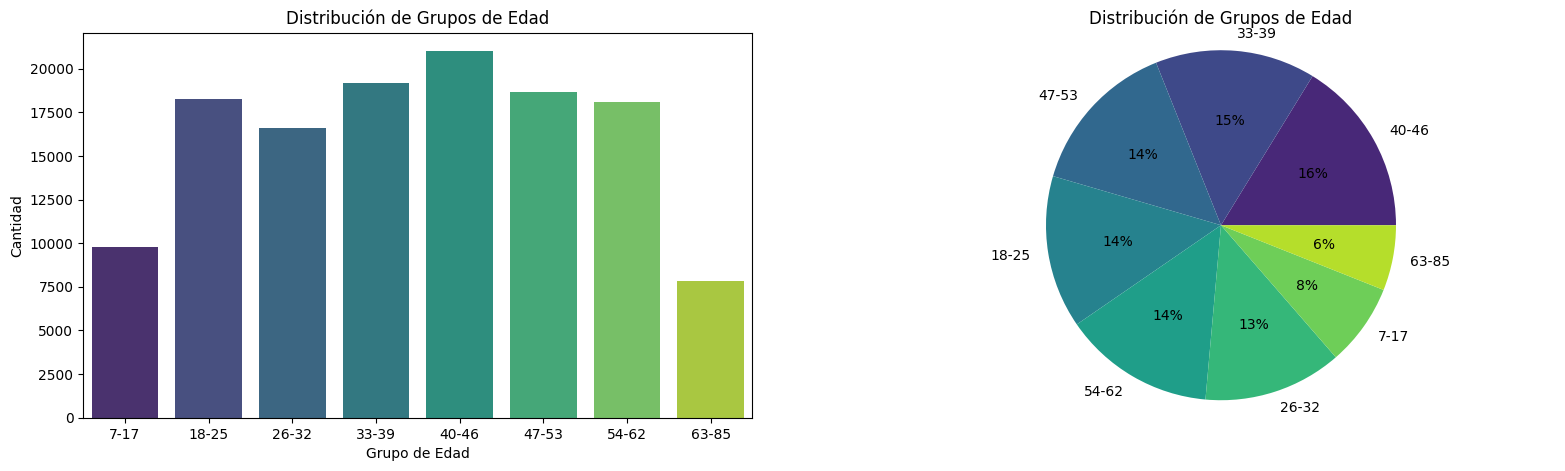

In [14]:
new_features_df = pd.DataFrame(data)
X = new_features_df[['Age']].values
k = 8
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
new_features_df['Age Cluster'] = kmeans.labels_

cluster_ranges_age = {}

# Iterar sobre cada clúster para encontrar los valores mínimos y máximos de edad
for cluster in range(k):
    ages_in_cluster = new_features_df[new_features_df['Age Cluster'] == cluster]['Age']
    cluster_ranges_age[cluster] = (ages_in_cluster.min(), ages_in_cluster.max())
    
# Crear una columna nueva con las etiquetas descriptivas
new_features_df['Age Cluster'] = new_features_df['Age Cluster'].map(lambda cluster: f"{cluster_ranges_age[cluster][0]}-{cluster_ranges_age[cluster][1]}")
new_features_df['Min Age'] = new_features_df['Age Cluster'].map(lambda cluster: int(cluster.split('-')[0]))

# Ordenar el DataFrame por la distancia mínima
new_features_df = new_features_df.sort_values('Min Age')
new_features_df = new_features_df.drop(columns=['Min Age'])

#Visualización del nuevo feature "Age Cluster"
fig, axes = plt.subplots(1, 2, figsize=(19, 5))

pie_chart(new_features_df['Age Cluster'], axes[1],"Distribución de Grupos de Edad")
bar_chart(new_features_df,'Age Cluster',new_features_df['Age Cluster'],'Grupo de Edad',"Distribución de Grupos de Edad",axes[0])

plt.show()

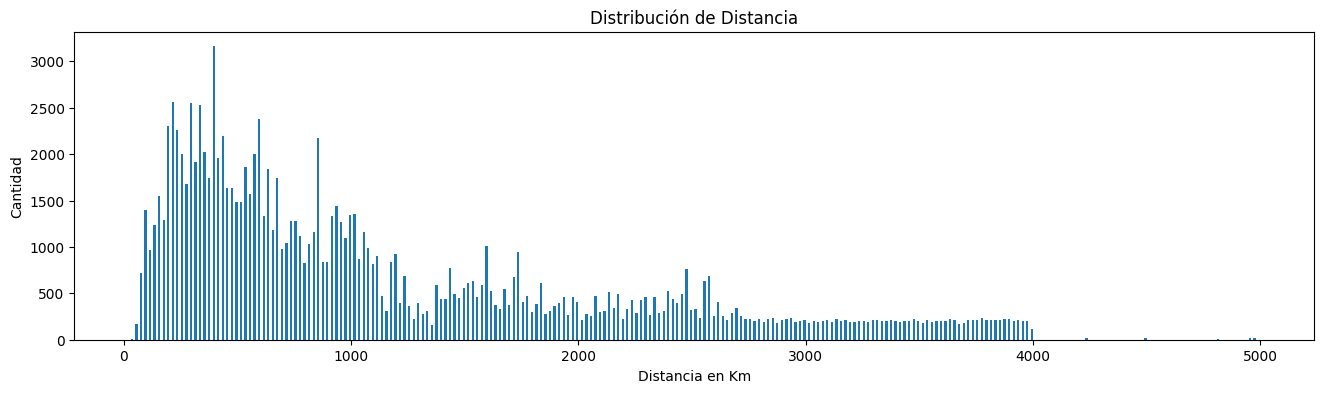

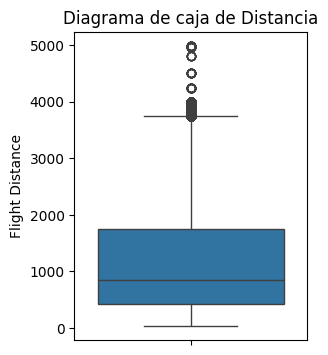

In [15]:
#Histograma de la columna distacia de vuelo en km

plt.figure(figsize=(16, 4))
bins = list(range(30,5000,20))
data["Flight Distance"].plot(kind="hist", width=10,bins=bins);
plt.title("Distribución de Distancia")
plt.xlabel("Distancia en Km")
plt.ylabel("Cantidad")
plt.show()

#Gráfico de caja de la columna edad
fig, ax = plt.subplots(figsize=(3, 4)) 
sns.boxplot(data["Flight Distance"]);
plt.title("Diagrama de caja de Distancia");
plt.show()

c:\Users\ddcre\anaconda3\envs\tensorenviron\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


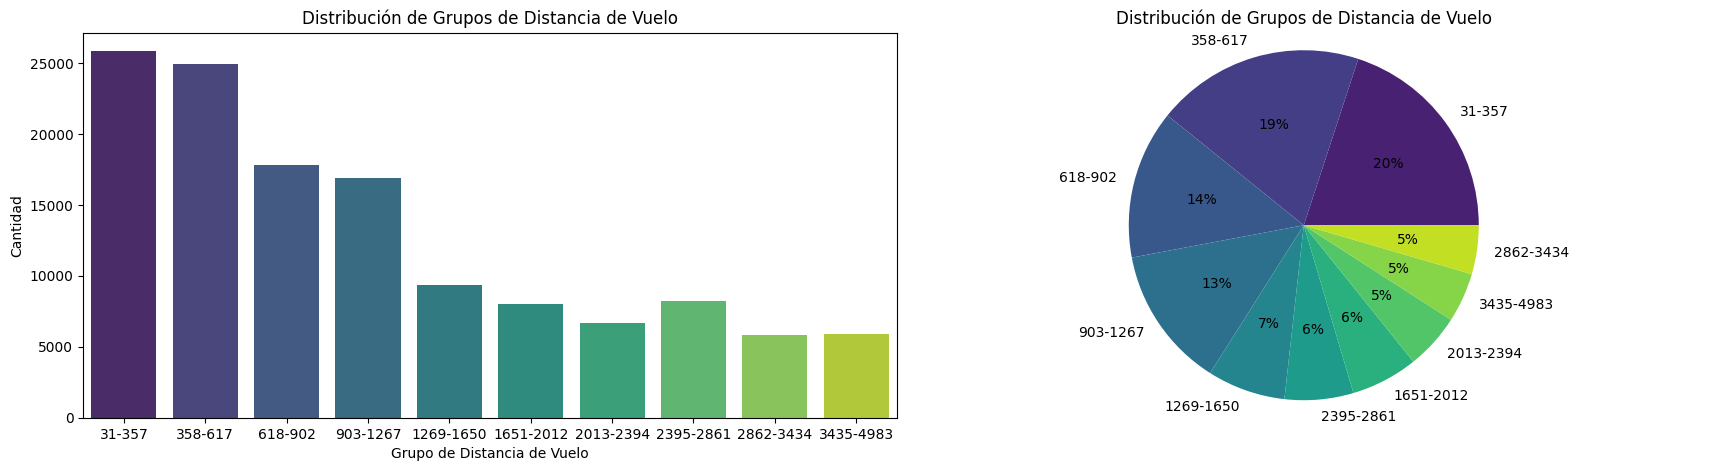

In [16]:
# Clustering por Distancia de Vuelo
new_features_df = pd.DataFrame(new_features_df)
X_distance = new_features_df[['Flight Distance']].values
k_distance = 10
kmeans_distance = KMeans(n_clusters=k_distance, random_state=0)
kmeans_distance.fit(X_distance)

cluster_results = kmeans_distance.labels_

new_features_df['Distance Cluster'] = cluster_results

cluster_ranges_distance = {}

# Iterar sobre cada clúster para encontrar los valores mínimos y máximos de edad
for cluster in range(k_distance):
    distance_in_cluster = new_features_df[new_features_df['Distance Cluster'] == cluster]['Flight Distance']
    cluster_ranges_distance[cluster] = (distance_in_cluster.min(), distance_in_cluster.max())

# Crear una columna nueva con las etiquetas descriptivas
new_features_df['Distance Cluster'] = new_features_df['Distance Cluster'].map(lambda cluster: f"{cluster_ranges_distance[cluster][0]}-{cluster_ranges_distance[cluster][1]}")
new_features_df['Min Distance'] = new_features_df['Distance Cluster'].map(lambda cluster: int(cluster.split('-')[0]))

# Ordenar el DataFrame por la distancia mínima
new_features_df = new_features_df.sort_values('Min Distance')
new_features_df = new_features_df.drop(columns=['Min Distance'])

#Visualización del nuevo feature "Distance Cluster"
fig, axes = plt.subplots(1, 2, figsize=(21, 5))

pie_chart(new_features_df['Distance Cluster'], axes[1],"Distribución de Grupos de Distancia de Vuelo")
bar_chart(new_features_df,'Distance Cluster',new_features_df['Distance Cluster'],'Grupo de Distancia de Vuelo',"Distribución de Grupos de Distancia de Vuelo",axes[0])
plt.subplots_adjust(wspace=0)

plt.show()

In [17]:
data["Departure Delay in Minutes"].describe()

count    129487.000000
mean         14.643385
std          37.932867
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

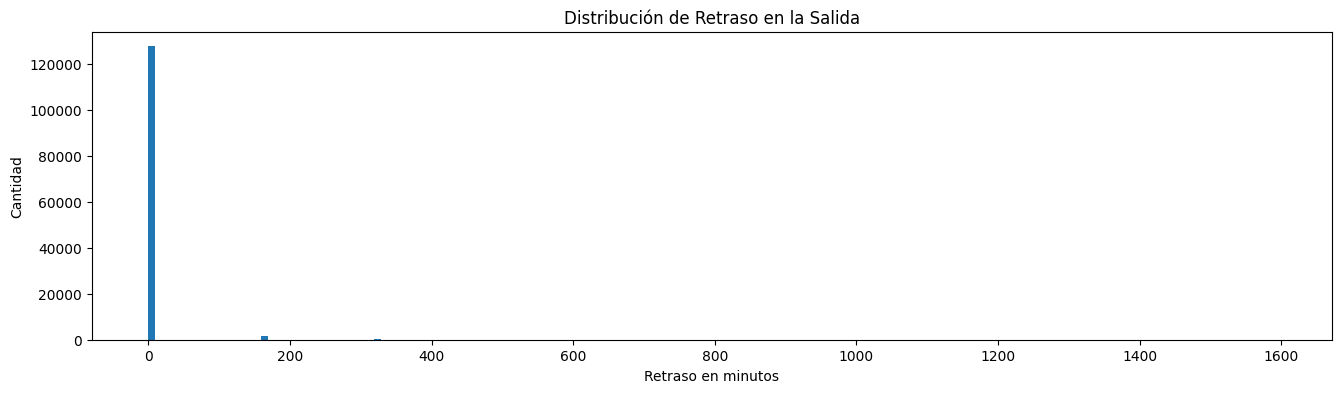

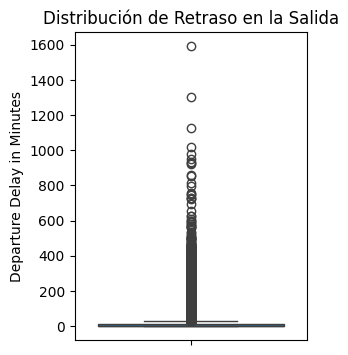

In [18]:
#Histograma de la columna retraso de la salida 

plt.figure(figsize=(16, 4))
data["Departure Delay in Minutes"].plot(kind="hist", width=10)
plt.title("Distribución de Retraso en la Salida")
plt.xlabel("Retraso en minutos")
plt.ylabel("Cantidad")
plt.show()

#Gráfico de caja de la columna edad
fig, ax = plt.subplots(figsize=(3, 4)) 
sns.boxplot(data["Departure Delay in Minutes"])
plt.title("Distribución de Retraso en la Salida")
plt.show()

In [19]:
data["Arrival Delay in Minutes"].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

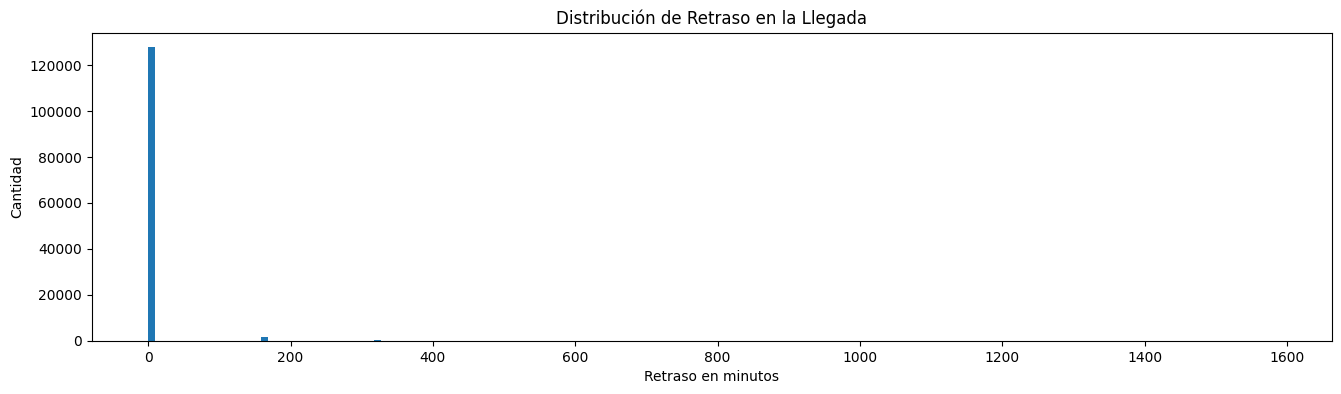

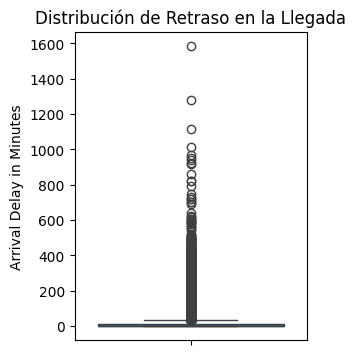

In [20]:
#Histograma de la columna retraso de la llegada 

plt.figure(figsize=(16, 4))
data["Arrival Delay in Minutes"].plot(kind="hist", width=10)
plt.title("Distribución de Retraso en la Llegada")
plt.xlabel("Retraso en minutos")
plt.ylabel("Cantidad")
plt.show()

#Gráfico de caja de la columna edad
fig, ax = plt.subplots(figsize=(3, 4)) 
sns.boxplot(data["Arrival Delay in Minutes"])
plt.title("Distribución de Retraso en la Llegada")
plt.show()

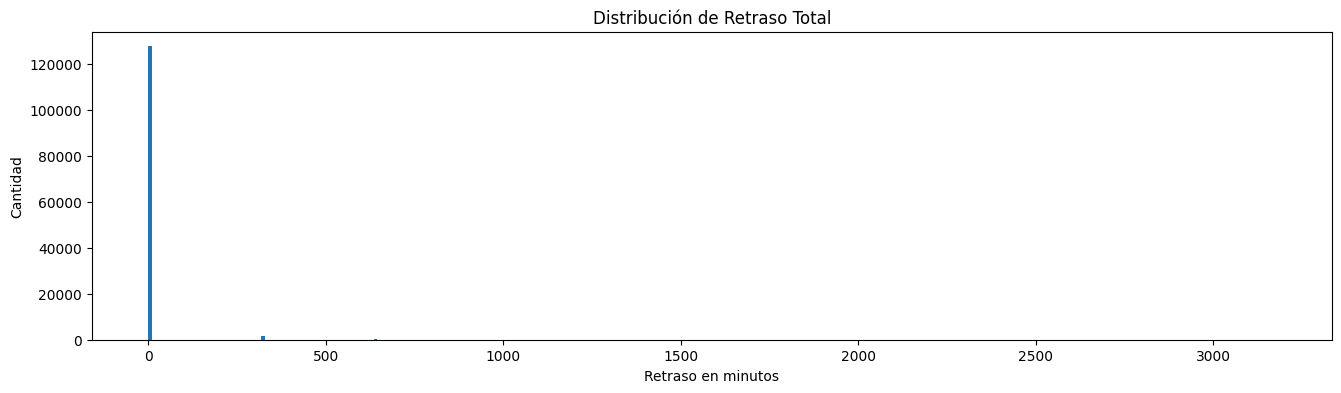

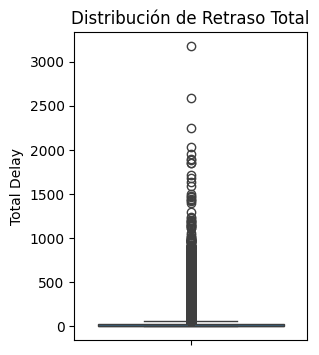

In [21]:
new_features_df['Total Delay'] = new_features_df['Arrival Delay in Minutes'] + new_features_df['Departure Delay in Minutes']

plt.figure(figsize=(16, 4))
new_features_df["Total Delay"].plot(kind="hist", width=10)
plt.title("Distribución de Retraso Total")
plt.xlabel("Retraso en minutos")
plt.ylabel("Cantidad")
plt.show()

#Gráfico de caja de la columna edad
fig, ax = plt.subplots(figsize=(3, 4)) 
sns.boxplot(new_features_df["Total Delay"])
plt.title("Distribución de Retraso Total")
plt.show()

c:\Users\ddcre\anaconda3\envs\tensorenviron\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


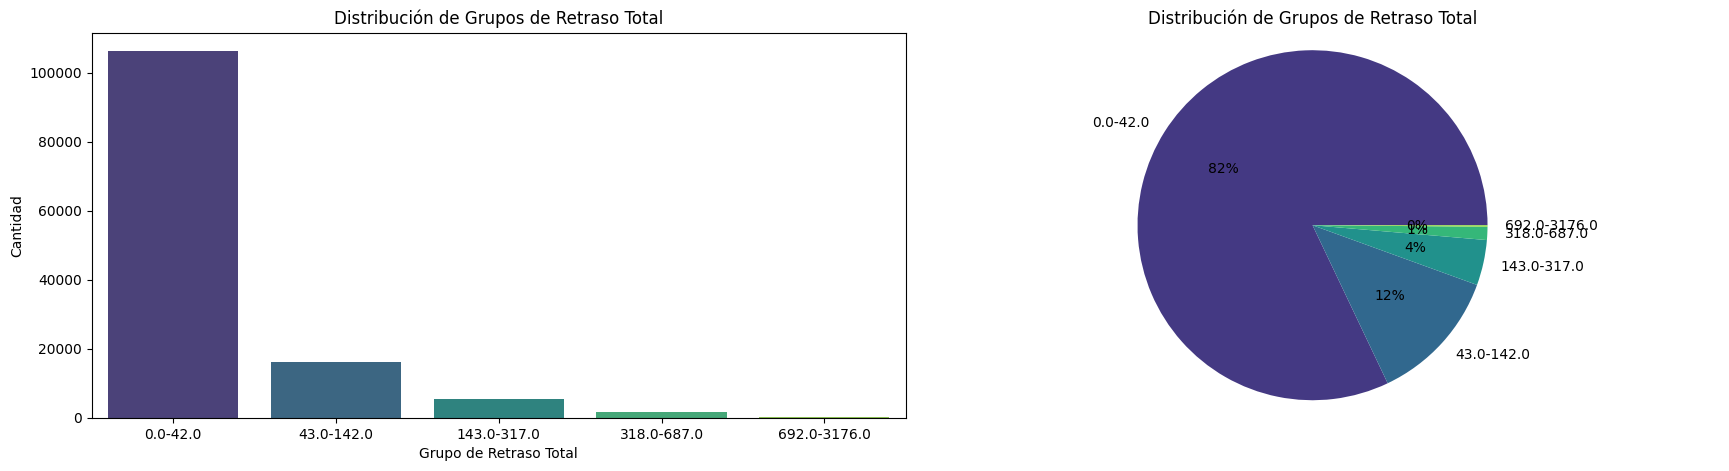

In [22]:
new_features_df = pd.DataFrame(new_features_df)

# Clustering por Distancia de Vuelo
X_delay = new_features_df[['Total Delay']].values
k_delay = 5
kmeans_delay = KMeans(n_clusters=k_delay, random_state=0)
kmeans_delay.fit(X_delay)
new_features_df['Total Delay Cluster'] = kmeans_delay.labels_

cluster_ranges_delay = {}

# Iterar sobre cada clúster para encontrar los valores mínimos y máximos de edad
for cluster in range(k_distance):
    delay_in_cluster = new_features_df[new_features_df['Total Delay Cluster'] == cluster]['Total Delay']
    cluster_ranges_delay[cluster] = (delay_in_cluster.min(), delay_in_cluster.max())

# Crear una columna nueva con las etiquetas descriptivas
new_features_df['Total Delay Cluster'] = new_features_df['Total Delay Cluster'].map(lambda cluster: f"{cluster_ranges_delay[cluster][0]}-{cluster_ranges_delay[cluster][1]}")
new_features_df['Min Delay'] = new_features_df['Total Delay Cluster'].map(lambda cluster: int(float(cluster.split('-')[0])))

# Ordenar el DataFrame por la distancia mínima
new_features_df = new_features_df.sort_values('Min Delay')
new_features_df = new_features_df.drop(columns=['Min Delay'])

#Visualización del nuevo feature "Distance Cluster"
fig, axes = plt.subplots(1, 2, figsize=(21, 5))

pie_chart(new_features_df['Total Delay Cluster'], axes[1],"Distribución de Grupos de Retraso Total")
bar_chart(new_features_df,'Total Delay Cluster',new_features_df['Total Delay Cluster'],'Grupo de Retraso Total',"Distribución de Grupos de Retraso Total",axes[0])
plt.subplots_adjust(wspace=0)

plt.show()

In [23]:
features_added_df = pd.DataFrame(new_features_df[['satisfaction', 'Age Cluster', 'Distance Cluster', 'Total Delay Cluster']])
drop_columns = ['Gender','Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction']
services_df = data.drop(drop_columns, axis=1)

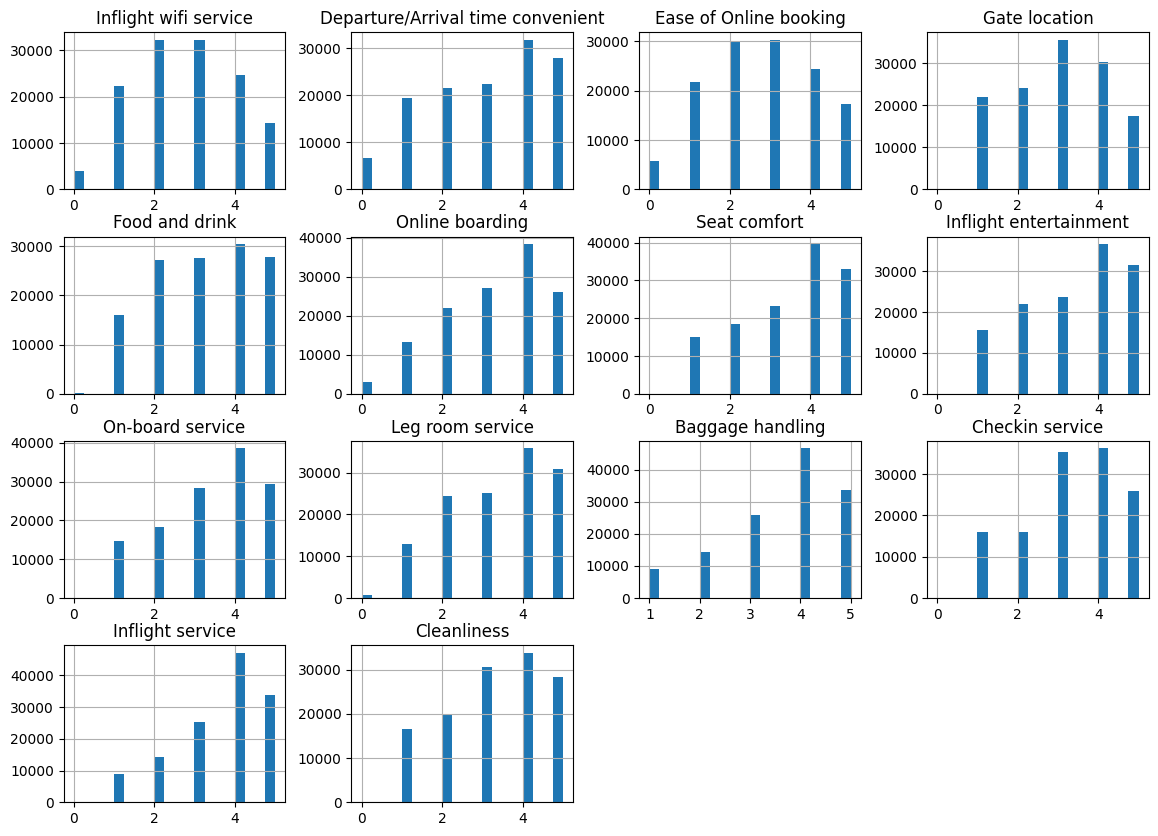

In [24]:
# Análisis de las columnas que decsirben niveles de satisfacción

services_df.hist(bins=20, figsize=(14, 10))
plt.show()

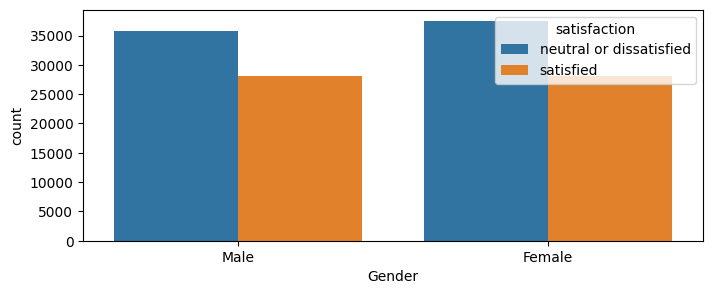

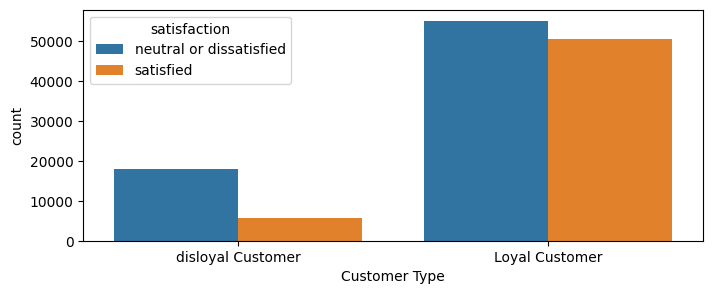

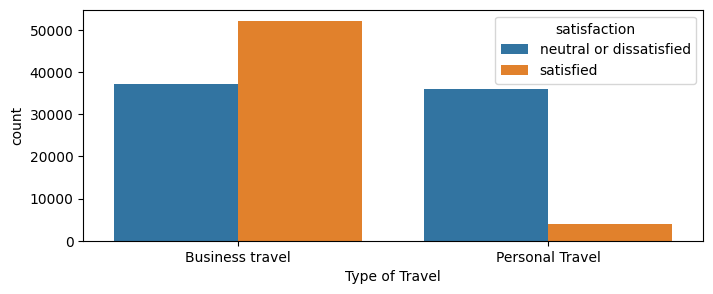

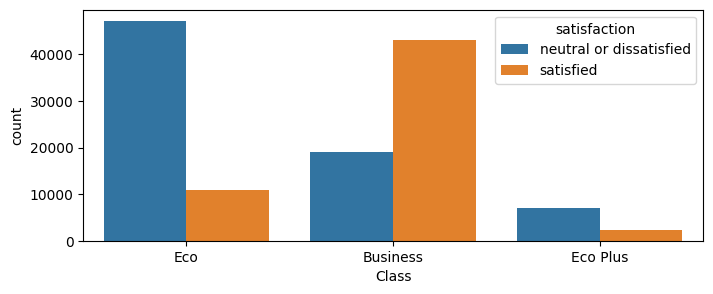

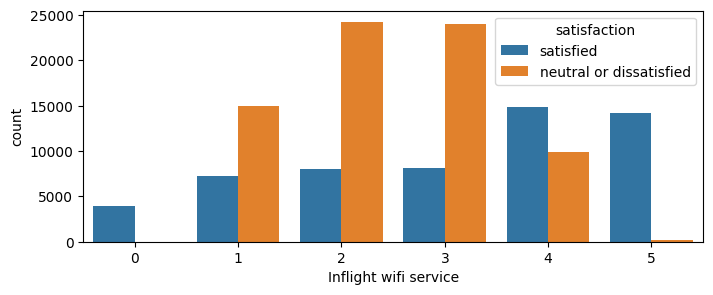

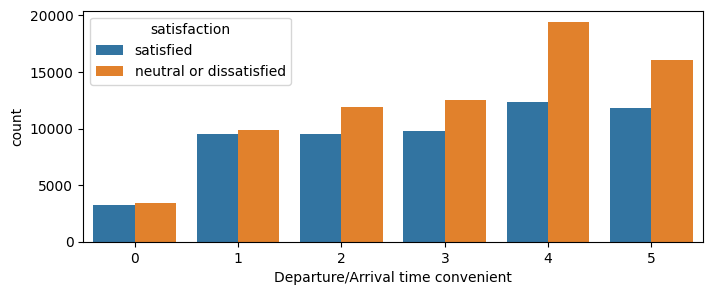

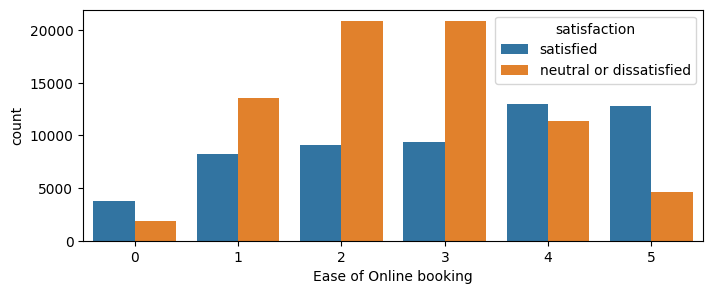

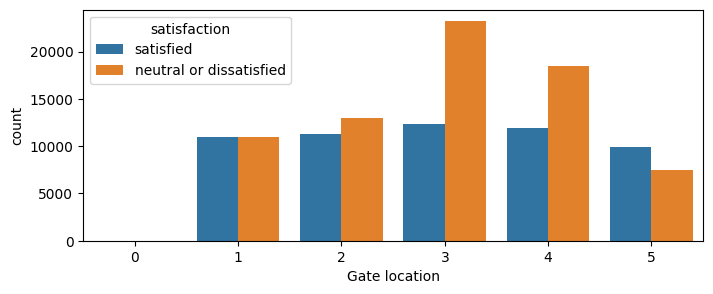

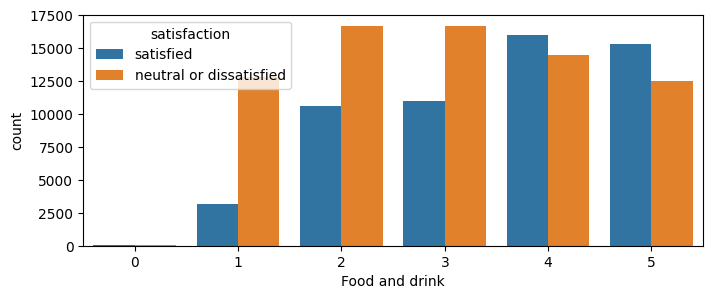

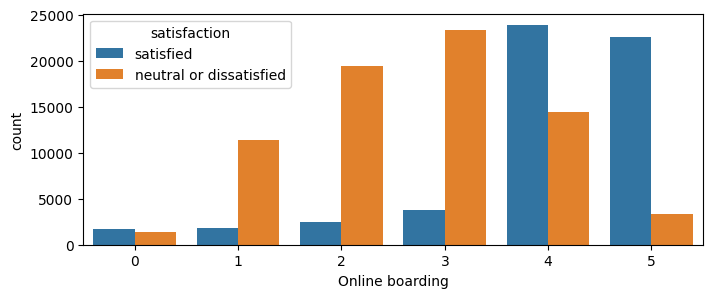

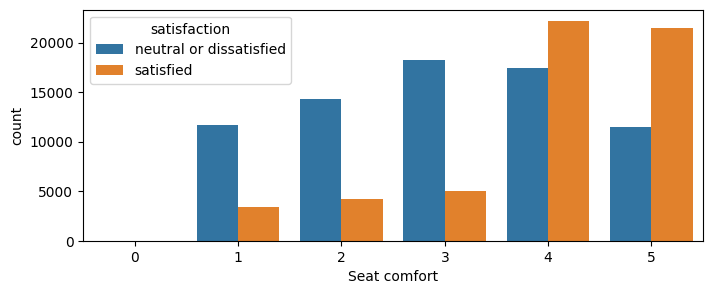

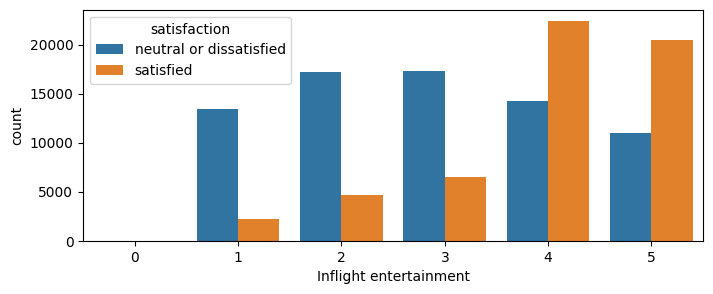

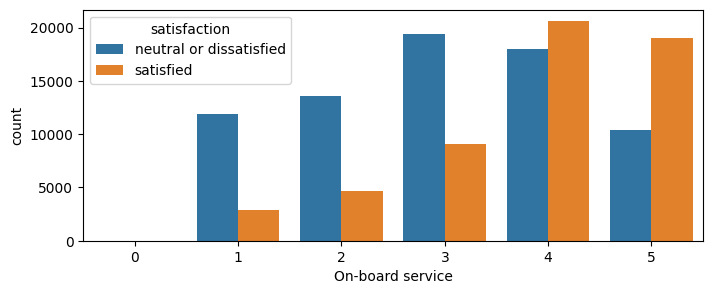

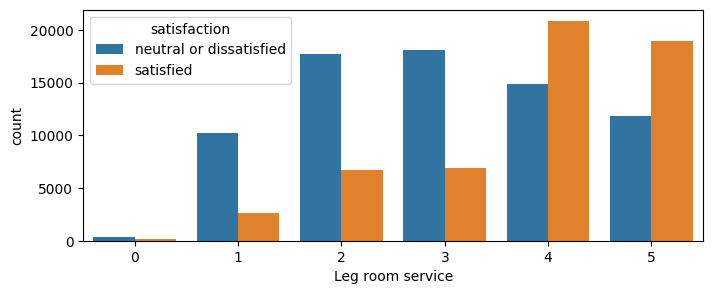

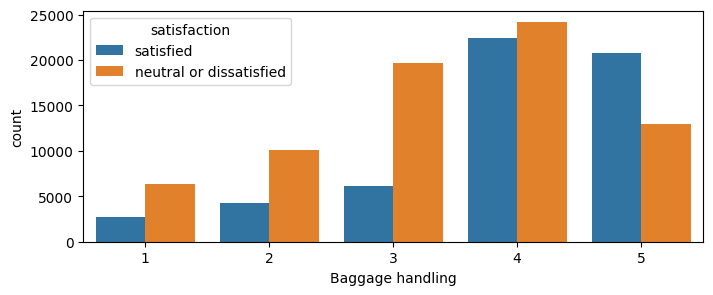

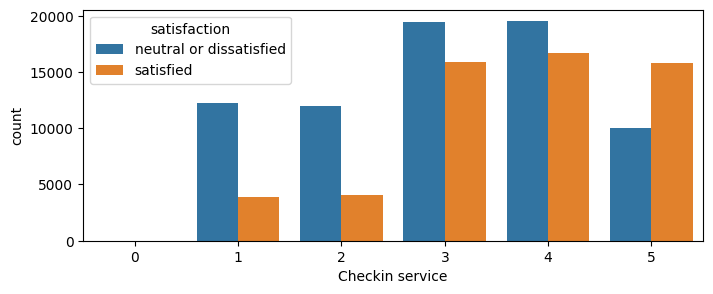

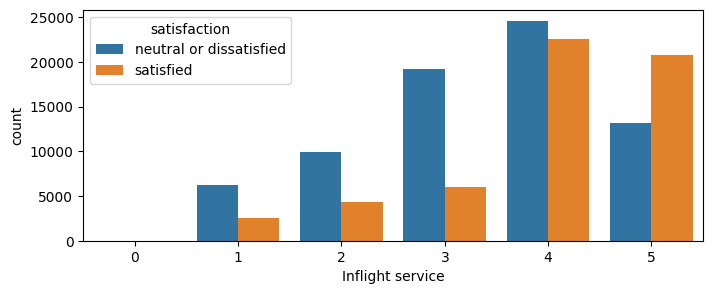

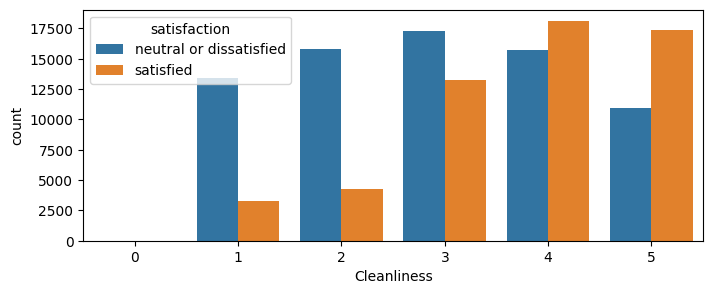

In [25]:
# Análisis Bivariable
drop_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction']
cate_columns = data.drop(drop_columns, axis=1)

for column in cate_columns:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=column, hue='satisfaction', data=new_features_df)
    plt.show()

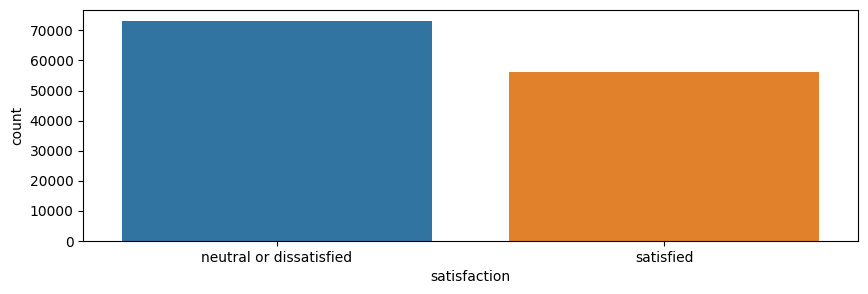

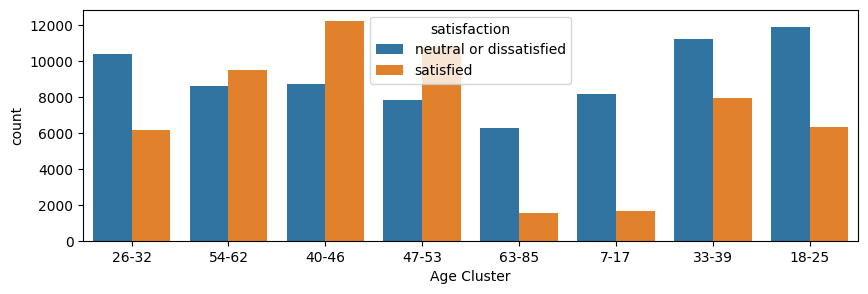

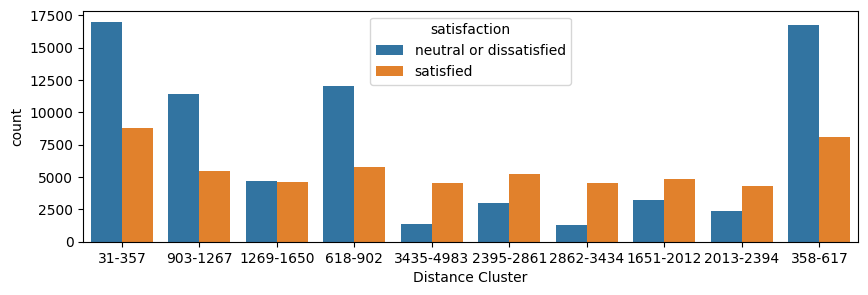

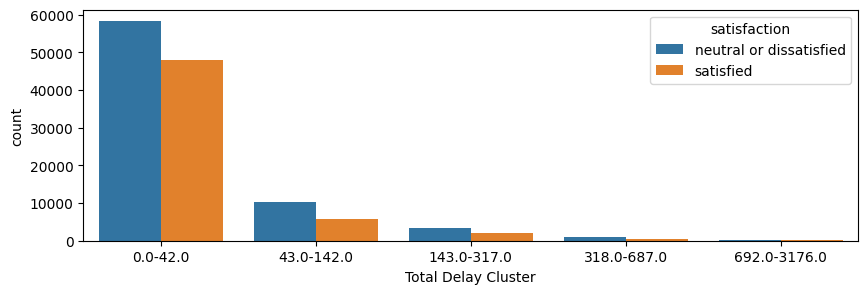

In [26]:
for column in features_added_df.columns:
    plt.figure(figsize=(10, 3))
    sns.countplot(x=column, hue='satisfaction', data=features_added_df)
    plt.show()

# Creación de Nuevos Features para el Modelo

In [27]:
# data set con valores continuos
data_transformed = new_features_df.copy()

# Aplicar Label Encoding a las columnas categóricas
label_encoder = LabelEncoder()
for column in data_transformed.select_dtypes(include=['object']).columns:
    data_transformed[column] = label_encoder.fit_transform(data_transformed[column])

In [28]:
# Media de todos los servicios que tienen valor del 0-5
features_added_df['Mean Satisfaction Services'] = data[['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink',
                                  'Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']].mean(axis=1)

# Peso sobre la conformidad de los pasajeros
features_added_df['Weight Comfort Seats'] = (services_df['Seat comfort']/5 + data_transformed['Class'] + data_transformed['Type of Travel'])

# Suma del Servicio en Vuelo
features_added_df['Sum Inflight Services'] = services_df['Inflight wifi service'] + services_df['Inflight service'] + services_df['Inflight entertainment'] + services_df['Online boarding']

# Peso sobre el espacio de los pies según la clase
features_added_df['Space Seat and Class'] = (data_transformed['Class'] * services_df['Leg room service']) / 5

# suma de servicios básicos
features_added_df['Weight Basic Services'] = data_transformed['Class'] + (services_df['Food and drink'] + services_df['Cleanliness'])/10 

features_added_df

#features_added_df = features_added_df.drop(columns='Sum Basic Services')

,satisfaction,Age Cluster,Distance Cluster,Total Delay Cluster,Mean Satisfaction Services,Weight Comfort Seats,Sum Inflight Services,Space Seat and Class,Weight Basic Services
97458,neutral or dissatisfied,26-32,31-357,0.0-42.0,2.642857,1.8,10,0.2,1.8
119406,neutral or dissatisfied,26-32,903-1267,0.0-42.0,2.571429,1.6,9,0.6,1.5
41020,neutral or dissatisfied,54-62,903-1267,0.0-42.0,3.214286,2.8,9,0.8,1.6
113476,neutral or dissatisfied,40-46,903-1267,0.0-42.0,2.571429,1.4,9,0.8,1.4
51690,satisfied,47-53,903-1267,0.0-42.0,3.142857,1.4,13,1.0,1.4
...,...,...,...,...,...,...,...,...,...
20867,satisfied,40-46,2862-3434,692.0-3176.0,3.357143,0.6,13,0.0,0.7
60516,neutral or dissatisfied,47-53,903-1267,692.0-3176.0,3.428571,3.0,11,1.0,1.6
53171,neutral or dissatisfied,40-46,31-357,692.0-3176.0,2.857143,3.0,16,0.2,1.5
42219,neutral or dissatisfied,18-25,903-1267,692.0-3176.0,3.571429,3.8,15,1.6,2.6


In [29]:
# data set con valores continuos
features_added_transformed = features_added_df.copy()

# Aplicar Label Encoding a las columnas categóricas
label_encoder = LabelEncoder()
for column in features_added_df.select_dtypes(include=['object']).columns:
    features_added_transformed[column] = label_encoder.fit_transform(features_added_transformed[column])
    
# data set con valores continuos
data_transformed = data.copy()

# Aplicar Label Encoding a las columnas categóricas
for column in data.select_dtypes(include=['object']).columns:
    data_transformed[column] = label_encoder.fit_transform(data_transformed[column])

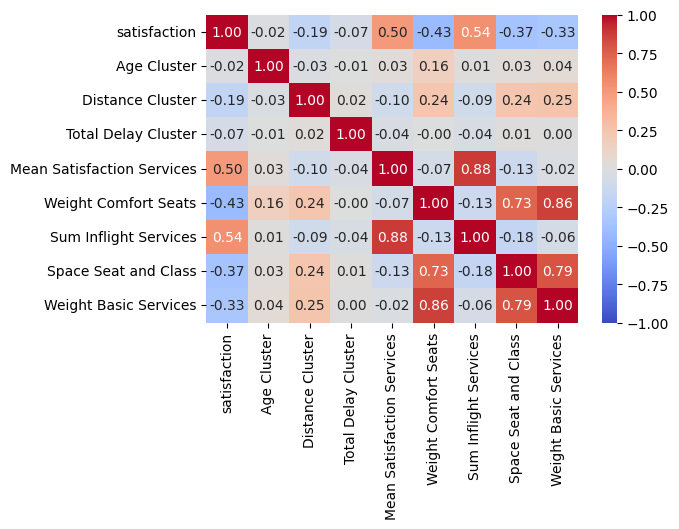

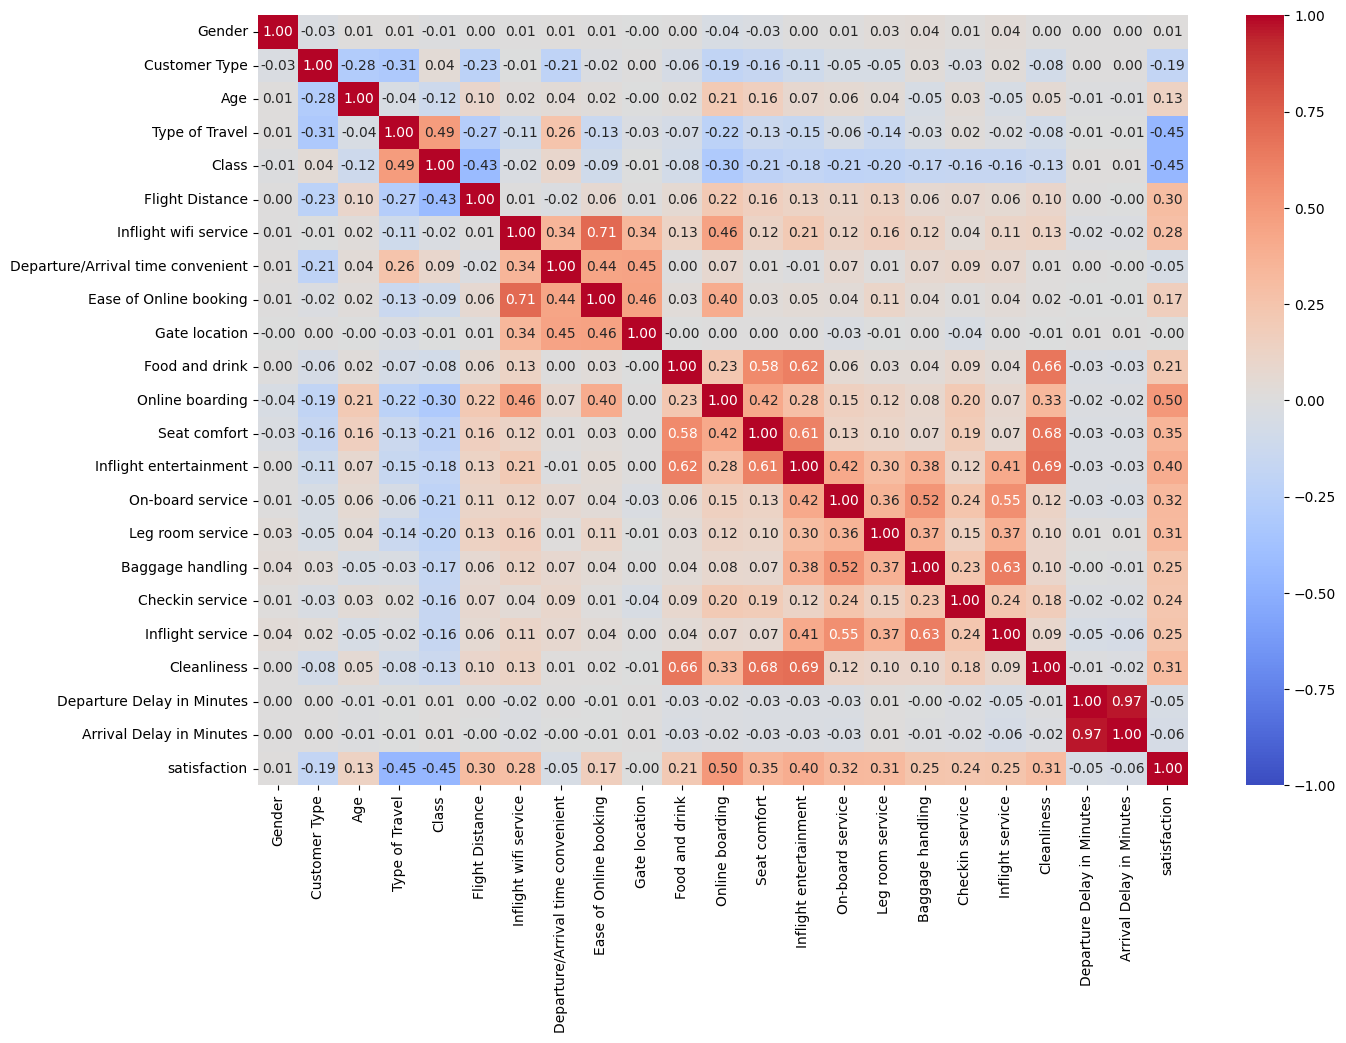

In [30]:
# Correlación de los nuevos features
corr = features_added_transformed.corr()

plt.figure(figsize=(6,4)) # Ajustar el tamaño del gráfico
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

# Correlación de la tabla original

corr = data_transformed.corr()
plt.figure(figsize=(15,10)) # Ajustar el tamaño del gráfico
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

# 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Separar las características (X) y la variable objetivo (Y)
X = data_transformed.drop(columns=['satisfaction', 'Age', 'Flight Distance', 'Total Delay', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'])
Y = data_transformed['satisfaction']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Entrenar un modelo de RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Crear un DataFrame con las características y su importancia
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar las características por su importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(feature_importance_df)

KeyError: "['Total Delay'] not found in axis"

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Crear nuevas características de interacción y polinomiales
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

# Entrenar un modelo de RandomForestClassifier con las nuevas características
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Crear un DataFrame con las nuevas características y su importancia
new_feature_names = poly.get_feature_names_out(input_features=X.columns)
feature_importance_df = pd.DataFrame({'Feature': new_feature_names, 'Importance': feature_importances})

# Ordenar las características por su importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(feature_importance_df[:20])

                                          Feature  Importance
165                  Online boarding Seat comfort    0.044491
166        Online boarding Inflight entertainment    0.044413
4                           Inflight wifi service    0.028426
168              Online boarding Leg room service    0.027962
172                   Online boarding Cleanliness    0.023523
167              Online boarding On-board service    0.022225
99          Inflight wifi service Online boarding    0.020609
171              Online boarding Inflight service    0.018668
106        Inflight wifi service Inflight service    0.018271
101  Inflight wifi service Inflight entertainment    0.017651
169              Online boarding Baggage handling    0.016984
96   Inflight wifi service Ease of Online booking    0.016338
78                    Class Inflight wifi service    0.015981
9                                 Online boarding    0.015942
97            Inflight wifi service Gate location    0.014866
88      

#

#

# PREGUNTAS

### 1. ¿Cuál es el nivel general de satisfacción de los pasajeros?, ¿cuáles son los porcentajes?



El nivel general de satisfacción nos dice que la mayoría de los pasajeros encuestados tienes una posición neutral o de insatisfacción con los diferentes servicios que propone la aerolinea, los valores correspondientes son de 57% de neutral o insatisfacción contra un 43% de pasajeros satisfechos.

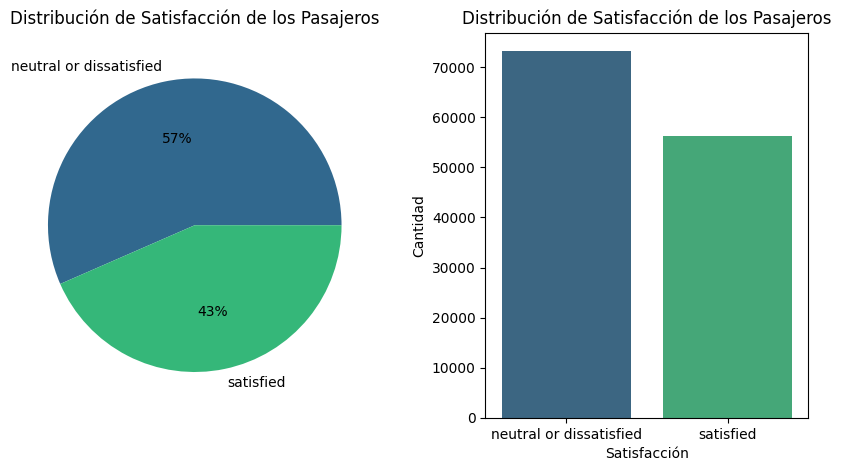

(array([ 1203., 12989., 34910., 45636., 28225.,  6524.]),
 array([1.07142857, 1.72619048, 2.38095238, 3.03571429, 3.69047619,
        4.3452381 , 5.        ]),
 <BarContainer object of 6 artists>)

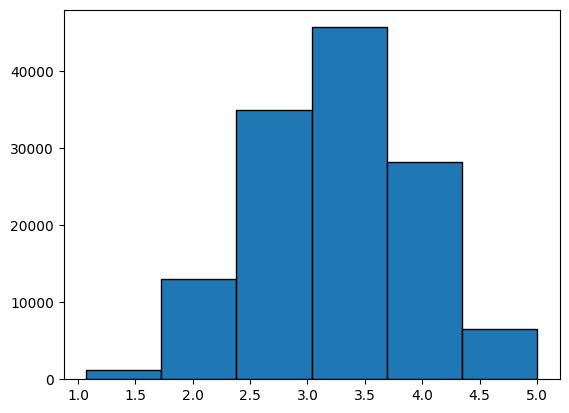

In [ ]:
# Nivel de satisfacción según la columna satisfied
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
pie_chart(data['satisfaction'], axes[0], "Distribución de Satisfacción de los Pasajeros")
bar_chart(data,'satisfaction',data['satisfaction'],'Satisfacción', "Distribución de Satisfacción de los Pasajeros",axes[1])
plt.subplots_adjust(wspace=0.4)
plt.show()

# Nivel de satisfacción según los servicios de la aerolínea
plt.hist(features_added_df['Mean Satisfaction Services'], bins=6, edgecolor='k')

### 2. ¿Cómo varía la satisfacción según el género de los pasajeros?

- Inicialmente se parte con una mayor cantidad de personas encuestados del género femenino por una mínima diferencia: 51% mujeres y 49% hombres.
- De acuerdo a esto se procede a trabajar con valores porcentuales para la comparación entre la satisfacción y el género.
- Se observa que el nivel de satisfacción de ambos géneros es minoritaria a comparación de la opinión neutral o de insatisfacción.
- De acuerdo a la compración entre ambos géneros la diferencia acerca de la opinión de satisfacción es del 1.13%, el cuál no se considera significativo. Si bien las mujeres tienden a estar más insatisfechas o neutrales que los hombres respecto al servicio de las aerolíneas, la diferencia es mínima, por lo que no se podría decir que la satisfacción varíe según el género del encuestado.

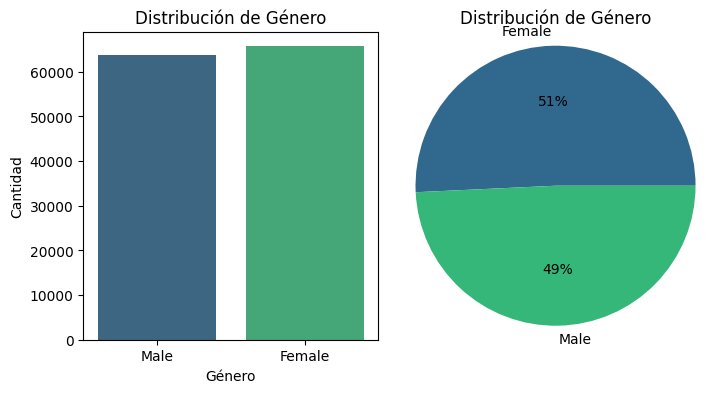

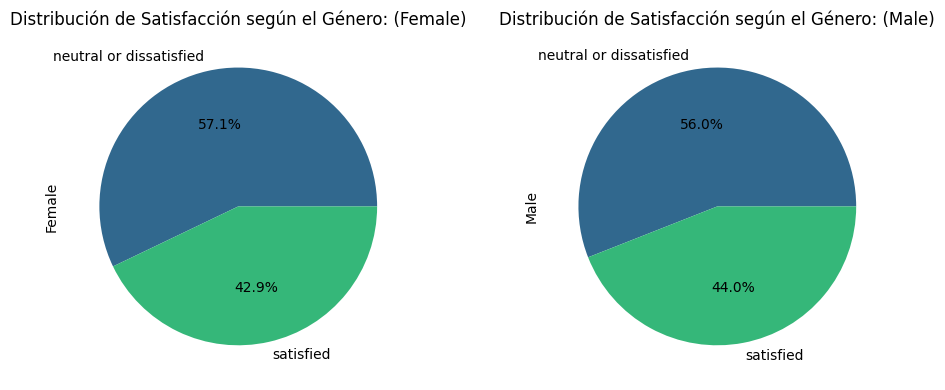

In [ ]:
# Distribución sólamente de la variable Género
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
pie_chart(data['Gender'], axes[1], "Distribución de Género")
bar_chart(data,'Gender',data['Gender'],'Género', "Distribución de Género",axes[0])
plt.subplots_adjust(wspace=0.1)
plt.show()

# Distribución según el Género y la Satisfacción
satisfaction_gender_df = data.groupby(['Gender', 'satisfaction']).size().unstack()
fig, axes = plt.subplots(1, len(satisfaction_gender_df), figsize=(10, 4))

for i, (gender, counts) in enumerate(satisfaction_gender_df.iterrows()):
    counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[i], colors=sns.color_palette('viridis', len(counts)))
    axes[i].set_title(f'Distribución de Satisfacción según el Género: ({gender})')

plt.tight_layout()
plt.show()

In [ ]:
female_satisfaction = satisfaction_gender_df.loc['Female', 'satisfied']*100/(satisfaction_gender_df.loc['Female'].sum())
male_satisfaction = satisfaction_gender_df.loc['Male', 'satisfied']*100/(satisfaction_gender_df.loc['Male'].sum())
difference_gender_satisfaction = abs(female_satisfaction - male_satisfaction)
difference_gender_satisfaction

1.1398303728991621

### 3. ¿Hay diferencias significativas según el grupo de edad?

- Primero se visualizó los valores de la columna 'Age', los cuales nos muestran ciertos patrones de opiniones según el valor de esta variable
- Se segmenta la edad en grupos significativos por medio de kmeans y se observa que las personas que pertenecen a los rangos de edad de 40-46, 47-53 y 54-62 tienden a estar mayormente satisfechas en general, sin embargo en edades menores y mayores a las mencionadas (menor a 40 y mayor a 62), las personas tienden a estar mayormente insatisfcehas o neutrales respecto al servicio.
- De acuerdo a la prueba estadística chi cuadrada, se determina que existe una diferencia significativa de la satisfacción con el grupo de edad.

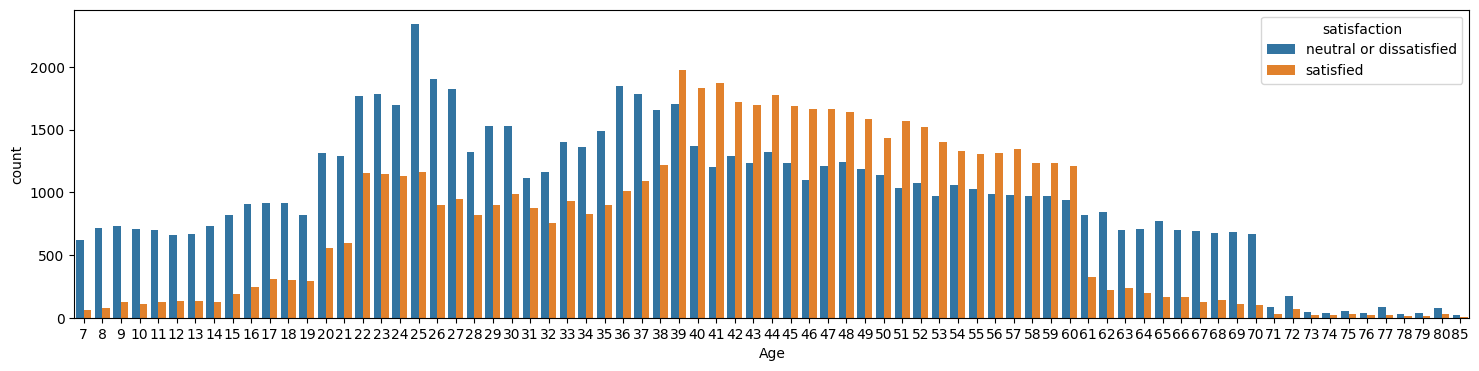

In [ ]:
plt.figure(figsize=(18, 4))
sns.countplot(x=data['Age'], hue='satisfaction', data=data)
plt.show()

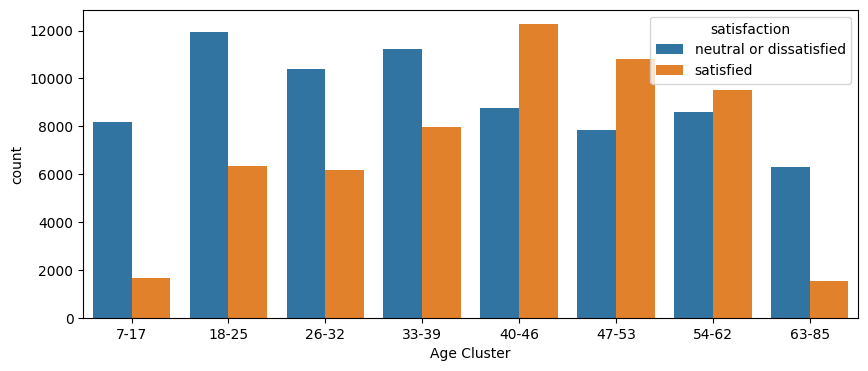

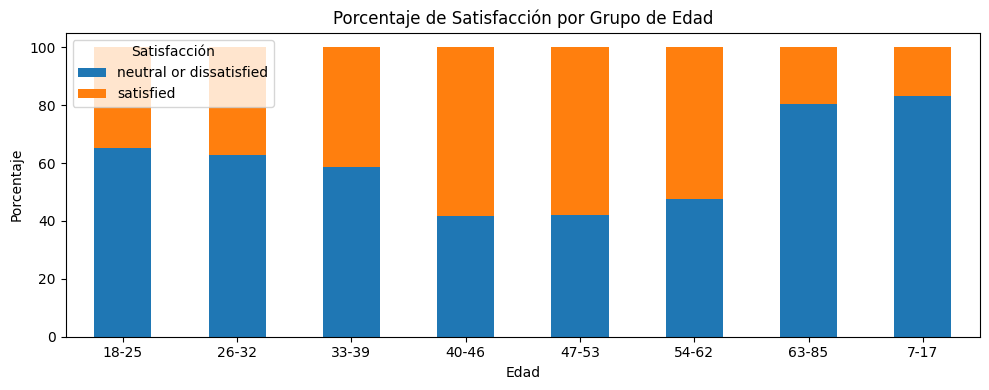

In [ ]:
features_added_df['Age_Start'] = features_added_df['Age Cluster'].apply(lambda x: int(x.split('-')[0]))
features_added_df = features_added_df.sort_values(by='Age_Start')
features_added_df.drop(columns=['Age_Start'], inplace=True)

plt.figure(figsize=(10, 4))
sns.countplot(x=features_added_df['Age Cluster'], hue='satisfaction', data=features_added_df)
plt.show()

age_groups = features_added_df.groupby(['Age Cluster','satisfaction']).size().unstack()
total_per_age = age_groups.sum(axis=1)
percentage_age_groups = age_groups.div(total_per_age, axis=0) * 100

#Gráfico de barras apiladas
percentage_age_groups.plot(kind='bar', stacked=True, figsize=(10, 4))
plt.xlabel('Edad')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Satisfacción por Grupo de Edad')
plt.legend(title='Satisfacción')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
alpha = 0.05
contingency_table = pd.crosstab(features_added_df['Age Cluster'], features_added_df['satisfaction'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
if p_value < alpha:
    print("Hay diferencias significativas en la satisfacción según el grupo de edad (rechazamos la hipótesis nula).")
else:
    print("No hay diferencias significativas en la satisfacción según el grupo de edad (no rechazamos la hipótesis nula).")

Hay diferencias significativas en la satisfacción según el grupo de edad (rechazamos la hipótesis nula).


# 4. ¿Qué diferencias existen en la satisfacción entre clientes leales y no leales?

# 5. ¿Cómo afecta el tipo de viaje (Personal vs. de Negocios) la satisfacción del pasajero?

# 6. ¿Qué servicios influyen más en la satisfacción general del pasajero (wifi, entretenimiento a bordo, comodidad del asiento, etc.)?





7. ¿Cuáles son los servicios que satisfacen más y cuáles dejan más insatisfechos a la clase de
Negocios?
8. ¿Cómo afecta el retraso en la salida y llegada la satisfacción del pasajero?, ¿hay una correlación?
9. ¿Existen correlaciones significativas entre diferentes niveles de satisfacción?
10.¿Qué segmentos de clientes existen en base a demografía, tipo de cliente, tipo de viaje y clase?,
¿cuáles muestran mayores niveles de satisfacción? 

In [37]:
data_transformed.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [43]:
X_original_data = data_transformed[['Type of Travel','Class','Online boarding']]
X_features_data = features_added_transformed[['Age Cluster', 'Weight Comfort Seats','Mean Satisfaction Services', 'Sum Inflight Services','Space Seat and Class', 'Weight Basic Services', 'satisfaction']]

combined_data = pd.concat([X_original_data, X_features_data], axis=1)
combined_data


,Type of Travel,Class,Online boarding,Age Cluster,Weight Comfort Seats,Mean Satisfaction Services,Sum Inflight Services,Space Seat and Class,Weight Basic Services,satisfaction
0,1,2,3,7,4.0,3.857143,16,1.2,3.0,0
1,0,0,3,0,0.2,2.285714,11,0.0,0.2,0
2,0,0,5,1,1.0,3.714286,16,0.0,1.0,1
3,0,0,2,0,0.4,3.000000,10,0.0,0.4,0
4,0,0,5,5,1.0,3.500000,14,0.0,0.7,1
...,...,...,...,...,...,...,...,...,...,...
129875,0,0,3,2,0.8,3.357143,15,0.0,0.8,0
129876,0,0,4,0,0.8,4.285714,17,0.0,0.8,1
129877,1,1,1,7,2.4,3.000000,9,0.6,1.4,0
129878,0,0,4,7,0.8,3.642857,16,0.0,0.8,1


In [44]:
X = combined_data
y = combined_data['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Normalizar los datos
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])